**Gia đoạn 2**

**Recap:** 

*   Đọc dữ liệu
*   Tìm stop words
*   Tìm các từ xuất hiện nhiều trùng giữa các topic
*   Thêm các từ trùng vào stop words

In [25]:
import os

path = "/content/drive/MyDrive/Colab Notebooks/google_colab"

Load dữ liệu bên clean

In [26]:
import pickle

with open(os.path.join(path, "Clean/topics.pkl"), 'rb') as rb:
   topics = pickle.load(rb)
topics

['Doi song',
 'Chinh tri Xa hoi',
 'Khoa hoc',
 'Suc khoe',
 'Phap luat',
 'Vi tinh',
 'Kinh doanh',
 'The thao',
 'The gioi',
 'Van hoa']

In [27]:
import pandas as pd
  
df = pd.read_pickle(os.path.join(path, "Clean/vi_df.pkl"))
df

,News,Topics
0,để trẻ_em phát_triển không bị lệch_lạc về giới...,0
1,sò_huyết ô loan đầm ô loan thuộc huyện tuy an ...,0
2,anh phan đã làm uổng công độc_giả em nghĩ rằng...,0
3,tôi có nên tiếp_tục tình_yêu với anh anh muốn ...,0
4,bình giữ nhiệt nóng lạnh với hai tính_năng vừa...,0
...,...,...
95,thu hà tôi không quan_tâm đến những lời đồn_th...,9
96,wet wet wet tái_hợp sau năm mỗi người mỗi ngả ...,9
97,khánh linh tôi giống như ngọn lửa nhỏ cháy mãi...,9
98,tiếng hát bên sông hàn bản tình_ca về gia_đình...,9


In [28]:
# Gom lại thành 1 dict có 10 key là 10 topics
# value là 1 chuỗi
def generateCorpusDict(df):
  news_dict = {}

  for idx, val in enumerate(topics):
      
      # gom thành 1 chuỗi lớn
      corpus = " ".join(df[df["Topics"] == idx].News)
      news_dict[val] = corpus

  return news_dict

In [29]:
corpus_dict = generateCorpusDict(df)

In [30]:
corpus_df = pd.DataFrame(corpus_dict.items(), columns=["Topics", "News"])

In [31]:
corpus_df

,Topics,News
0,Doi song,để trẻ_em phát_triển không bị lệch_lạc về giới...
1,Chinh tri Xa hoi,vì_sao nghệ_sĩ chưa kê_khai thuế thu_nhập theo...
2,Khoa hoc,cơ_chế bắn lưỡi của tắc_kè hoa loài tắc_kè hoa...
3,Suc khoe,nghệ an hơn trẻ_em mắc bệnhchim sệ cánh gtgt b...
4,Phap luat,đình_chỉ công_tác nguyễn việt bắc vũ mạnh tiên...
5,Vi tinh,need for speed most wanted đường đua rực lửa đ...
6,Kinh doanh,ấn độ giảm thuế_nhập_khẩu bạch_kim bộ tài_chín...
7,The thao,dos santos ronaldo đầu_quân cho nhđá thép pomi...
8,The gioi,sức_khoẻ arafat lại xấu đi tình_trạng sức_khoẻ...
9,Van hoa,đừng quy_kết chụp_mũ về hồ ngọc hà tôi đã rất ...


In [32]:
with open(os.path.join(path, "Clean/stop_words.pkl"), 'rb') as rb:
   stop_words = pickle.load(rb)

len(stop_words)

2563

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def showWordClound(news, stop_words):
    wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
    
    plt.rcParams['figure.figsize'] = [16, 6]
    
    topics = news.keys()
    for index, key in enumerate(topics):
        wc.generate(news[key])

        plt.subplot(3, 4, index+1)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(key)

    plt.show()
    

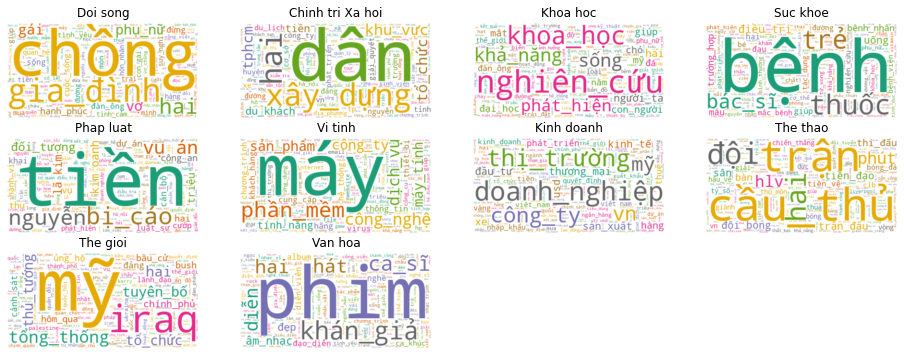

In [34]:
showWordClound(corpus_dict, stop_words)

****
*   Vì có các từ xuất hiện nhiều mà lại chung giữa các topic
*   Nên sẽ thêm các từ đó vào stop words
****

In [35]:
# thêm các từ warning bên CountVectorizer
stop_words = stop_words.union(['chừng_nào', 'tàn_tán', 'tần_tật'] )

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = stop_words)
data_cv = cv.fit_transform(corpus_df.News)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = topics

In [37]:
data_dtm

,a_dua,a_ho,aachen,ab,abba,abbas,abbey,abbott,abc,abdul,...,ứng_cử,ứng_cử_viên,ứng_cử_viên_chức,ứng_dụng,ứng_phó,ứng_tác,ứng_viên,ứng_xử,ừng_ực,ửng
Doi song,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
Chinh tri Xa hoi,1,1,0,0,0,0,0,0,0,0,...,0,0,0,6,0,1,0,1,0,0
Khoa hoc,0,0,0,1,0,0,0,0,0,0,...,0,1,0,6,0,0,0,0,0,0
Suc khoe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,0,0,0,1,0,2
Phap luat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vi tinh,0,0,0,0,0,0,0,0,0,0,...,0,1,0,47,0,0,0,0,0,0
Kinh doanh,0,0,0,0,0,0,0,6,0,0,...,0,1,0,0,1,0,0,1,0,0
The thao,0,0,4,0,0,0,2,0,0,0,...,0,5,1,0,0,0,5,1,0,0
The gioi,0,0,0,0,0,8,0,0,0,6,...,1,7,0,0,0,0,24,0,0,0
Van hoa,0,0,0,0,2,0,0,0,0,0,...,0,3,0,1,0,0,0,0,0,0


In [38]:
r_data_dtm = data_dtm.transpose()

In [39]:
r_data_dtm

,Doi song,Chinh tri Xa hoi,Khoa hoc,Suc khoe,Phap luat,Vi tinh,Kinh doanh,The thao,The gioi,Van hoa
a_dua,0,1,0,0,0,0,0,0,0,0
a_ho,0,1,0,0,0,0,0,0,0,0
aachen,0,0,0,0,0,0,0,4,0,0
ab,0,0,1,0,0,0,0,0,0,0
abba,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...
ứng_tác,0,1,0,0,0,0,0,0,0,0
ứng_viên,0,0,0,0,0,0,0,5,24,0
ứng_xử,1,1,0,1,0,0,1,1,0,0
ừng_ực,1,0,0,0,0,0,0,0,0,0


In [40]:
# tìm các từ xuất hiện nhiều nhất

top_dict = {}
for c in r_data_dtm.columns:
    top = r_data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))


In [41]:
for topic, top_words in top_dict.items():
    print(topic)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Doi song
chồng, gia_đình, hai, gái, phụ_nữ, vợ, sống, hạnh_phúc, cuộc_sống, món, tình_yêu, đừng, đàn_ông, trai
---
Chinh tri Xa hoi
dân, tp, du_lịch, công_ty, xây_dựng, hai, tổ_chức, tỉnh, khu_vực, trường, khu, tphcm, xe, nguyễn
---
Khoa hoc
nghiên_cứu, khoa_học, đại_học, khả_năng, sống, phát_hiện, người_ta, loài, biển, con_người, hai, đá, giúp, chó
---
Suc khoe
bệnh, thuốc, trẻ, bác_sĩ, điều_trị, máu, uống, bệnh_viện, bệnh_nhân, đau, trường_hợp, viêm, bé, giúp
---
Phap luat
vụ, nguyễn, tiền, công_an, bị_cáo, án, điều_tra, cơ_quan, oanh, đối_tượng, thu, hai, kim, công_ty
---
Vi tinh
máy, dịch_vụ, máy_tính, công_nghệ, phần_mềm, thông_tin, cung_cấp, hãng, internet, sản_phẩm, công_ty, tính_năng, thiết_bị, virus
---
Kinh doanh
doanh_nghiệp, thị_trường, usd, đầu_tư, công_ty, xe, thương_mại, mỹ, vn, tiền, kinh_tế, thuế, ngân_hàng, sản_xuất
---
The thao
đội, trận, hlv, bóng, hai, cầu_thủ, bàn, phút, trận_đấu, giải, sân, vn, tiền_đạo, giành
---
The gioi
mỹ, tổng_thống, iraq, bầu_cử, vụ, bush, 

In [42]:
# Thêm các từ trùng với nhau trong các topic vào stop word
from collections import Counter

words = []
for topic in r_data_dtm.columns:
    top = [word for (word, count) in top_dict[topic]]
    for t in top:
        words.append(t)

In [43]:
# Đếm số lần xuất hiện
Counter(words).most_common()

[('hai', 8),
 ('hàng', 5),
 ('tiền', 4),
 ('đường', 4),
 ('giúp', 4),
 ('công_ty', 4),
 ('nam', 4),
 ('mỹ', 4),
 ('máy', 3),
 ('phát_triển', 3),
 ('vn', 3),
 ('triệu', 3),
 ('quốc', 3),
 ('phụ_nữ', 2),
 ('sống', 2),
 ('đàn_ông', 2),
 ('minh', 2),
 ('mua', 2),
 ('tổ_chức', 2),
 ('tỉnh', 2),
 ('xe', 2),
 ('nguyễn', 2),
 ('phòng', 2),
 ('đảng', 2),
 ('nghiên_cứu', 2),
 ('khả_năng', 2),
 ('phát_hiện', 2),
 ('độ', 2),
 ('thế_giới', 2),
 ('bệnh', 2),
 ('trẻ', 2),
 ('vụ', 2),
 ('doanh_nghiệp', 2),
 ('chương_trình', 2),
 ('usd', 2),
 ('thị_trường', 2),
 ('việt', 2),
 ('giải', 2),
 ('chồng', 1),
 ('gia_đình', 1),
 ('gái', 1),
 ('vợ', 1),
 ('hạnh_phúc', 1),
 ('cuộc_sống', 1),
 ('món', 1),
 ('tình_yêu', 1),
 ('đừng', 1),
 ('trai', 1),
 ('đọc', 1),
 ('gà', 1),
 ('tình_cảm', 1),
 ('hôn_nhân', 1),
 ('suy_nghĩ', 1),
 ('thuê', 1),
 ('phở', 1),
 ('quan_hệ', 1),
 ('con_gái', 1),
 ('dân', 1),
 ('tp', 1),
 ('du_lịch', 1),
 ('xây_dựng', 1),
 ('khu_vực', 1),
 ('trường', 1),
 ('khu', 1),
 ('tphcm', 1),
 ('hu

In [44]:
# Nếu xuất hiện hơn 1 nữa topic thì vào stop words
common_stop_words = [word for word, count in Counter(words).most_common() if count > 5]

In [45]:
common_stop_words

['hai']

In [46]:
stop_words_v2 = stop_words.union(common_stop_words)

In [47]:
with open(os.path.join(path, "Analyze/stop_words.pkl"), 'wb') as wb:
   pickle.dump(stop_words_v2, wb)

**Tính lại**

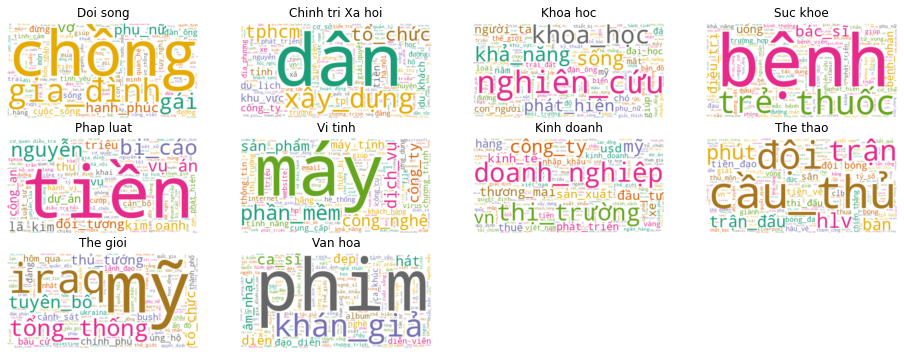

In [48]:
showWordClound(corpus_dict, stop_words_v2)